In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("ssh_date.db")
df = pd.read_sql_query("SELECT * from req", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

  month day    timest              ip  user   port    attack  \
0   фев  10  21:12:21  221.131.165.86  root      0      auth   
1   фев  10  21:12:24  221.131.165.86  root  49460  password   
2   фев  10  21:12:28  221.131.165.86  root  49460  password   
3   фев  10  21:12:32  221.131.165.86  root  49460  password   
4   фев  10  21:12:33  221.131.165.86  root      0      auth   

               alldate  one  
0  2021-02-10 21:12:21    1  
1  2021-02-10 21:12:24    1  
2  2021-02-10 21:12:28    1  
3  2021-02-10 21:12:32    1  
4  2021-02-10 21:12:33    1  


In [3]:
df['dt'] = pd.to_datetime(df['alldate'])

In [4]:
df

,month,day,timest,ip,user,port,attack,alldate,one,dt
0,фев,10,21:12:21,221.131.165.86,root,0,auth,2021-02-10 21:12:21,1,2021-02-10 21:12:21
1,фев,10,21:12:24,221.131.165.86,root,49460,password,2021-02-10 21:12:24,1,2021-02-10 21:12:24
2,фев,10,21:12:28,221.131.165.86,root,49460,password,2021-02-10 21:12:28,1,2021-02-10 21:12:28
3,фев,10,21:12:32,221.131.165.86,root,49460,password,2021-02-10 21:12:32,1,2021-02-10 21:12:32
4,фев,10,21:12:33,221.131.165.86,root,0,auth,2021-02-10 21:12:33,1,2021-02-10 21:12:33
...,...,...,...,...,...,...,...,...,...,...
163457,фев,19,16:37:32,13.66.131.233,root,57838,password,2021-02-19 16:37:32,1,2021-02-19 16:37:32
163458,фев,19,16:38:47,176.109.0.30,root,0,auth,2021-02-19 16:38:47,1,2021-02-19 16:38:47
163459,фев,19,16:38:49,176.109.0.30,root,40475,password,2021-02-19 16:38:49,1,2021-02-19 16:38:49
163460,фев,19,16:39:07,119.45.43.139,root,0,auth,2021-02-19 16:39:07,1,2021-02-19 16:39:07


In [5]:
pivot_t = pd.pivot_table(df, index='ip', values='one', aggfunc=np.sum)

In [6]:
attackers = pivot_t[1:].sort_values(['one'])


1. How often attacks occur - by the hour.
2. Is there any pattern?

In [7]:
auth_at = df[df['attack'] == 'auth'][['dt','ip','attack']]
pass_at = df[df['attack'] == 'password'][['dt','ip', 'attack']]

In [8]:
auth_at

,dt,ip,attack
0,2021-02-10 21:12:21,221.131.165.86,auth
4,2021-02-10 21:12:33,221.131.165.86,auth
5,2021-02-10 21:12:33,54.38.180.93,auth
6,2021-02-10 21:12:35,221.131.165.86,auth
11,2021-02-10 21:12:49,221.131.165.86,auth
...,...,...,...
163452,2021-02-19 16:36:53,106.54.74.188,auth
163454,2021-02-19 16:37:12,64.225.53.31,auth
163456,2021-02-19 16:37:30,13.66.131.233,auth
163458,2021-02-19 16:38:47,176.109.0.30,auth


In [9]:
pass_at.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85372 entries, 1 to 163461
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   dt      85372 non-null  datetime64[ns]
 1   ip      85372 non-null  object        
 2   attack  85372 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.6+ MB


https://khashtamov.com/ru/pandas-introduction/

In [10]:
pass_at['ip'].value_counts()

80.249.131.9       7799
45.141.84.10       1559
221.131.165.86     1512
221.131.165.85     1287
221.181.185.19      972
                   ... 
1.36.37.81            1
218.250.225.153       1
112.197.136.40        1
183.162.224.35        1
119.45.43.139         1
Name: ip, Length: 1583, dtype: int64

In [11]:
len(pass_at.ip.unique())


1583

In [12]:
pass_at.dt.min()

Timestamp('2021-02-10 21:12:24')

In [13]:
pass_at.dt.max()

Timestamp('2021-02-19 16:39:09')

In [14]:
pass_at.dt.max() - pass_at.dt.min()

Timedelta('8 days 19:26:45')

In [15]:
(pass_at.dt.max() - pass_at.dt.min()).seconds

70005

In [16]:
pass_at['hour'] = pass_at['dt'].dt.hour

In [17]:
pass_at['dt'].dt.hour

1         21
2         21
3         21
7         21
8         21
          ..
163453    16
163455    16
163457    16
163459    16
163461    16
Name: dt, Length: 85372, dtype: int64

In [18]:
pat = pass_at

In [19]:
at = pat.groupby(['ip', 'hour']).count().sort_values(['hour'])

<AxesSubplot:xlabel='ip,hour'>

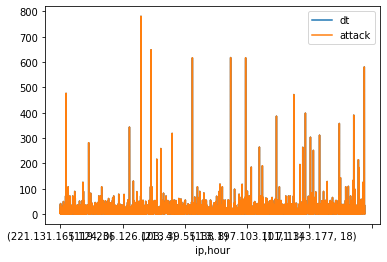

In [20]:
at.plot()

## Attack by bot segments

![](./img/04_segment_ip_attacks.png)


## "Wolf packs" of botnets (LF and HF botes)

![](./img/05_wolf_packs.png)
